In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv3D, Conv3DTranspose, LeakyReLU
from tensorflow.keras.models import Sequential
import numpy as np

# This version sum up y-axis and image size is bigger

## What kind of data are we working with?

In [2]:


# List all physical devices of type 'GPU'
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    print(f'Number of GPUs available: {len(gpus)}')
    for i, gpu in enumerate(gpus):
        print(f'GPU {i}: {gpu}')
else:
    print('No GPU detected.')




Number of GPUs available: 1
GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:
t1_img_test = nib.load("4D\A00000300_0011_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz")
t2 = nib.load('4D\A00037238_0012_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz')

In [4]:
print(t1_img_test.shape)
print(t2.shape)

(91, 109, 91, 146)
(91, 109, 91, 136)


In [5]:
t1_data = t1_img_test.get_fdata()
t1_data

array([[[[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        [[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        [[100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         ...,
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.],
         [100., 100., 100., ..., 100., 100., 100.]],

        ...,

  

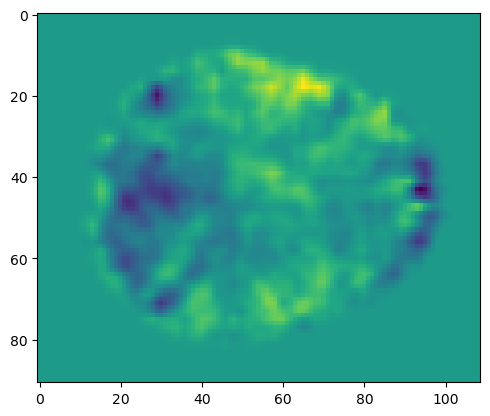

In [6]:
imgplot = plt.imshow(t1_data[:, :, 50, 13])

In [7]:
# try again with these slices
# [41:51,50:60,41:50,:]

# Matching fMRI files with IDs from demographic csv

In [3]:
import glob
import nibabel as nib
import os

# Specify the directory and file pattern
directory_path = '4D'
file_pattern = 'A*_????_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz'

# Construct the full path pattern
path_pattern = f'{directory_path}/{file_pattern}'

# Use glob to find all matching files
matching_files = glob.glob(path_pattern)


# Define the list of schizophrenia IDs

schizophrenia_ids = [
    'A00009280', 'A00028806', 'A00023132', 'A00014804', 'A00016859']

'''
schizophrenia_ids = [
    'A00009280', 'A00028806', 'A00023132', 'A00014804', 'A00016859', 'A00021598', 'A00001181', 'A00023158',
    'A00024568', 'A00028405', 'A00001251', 'A00000456', 'A00015648', 'A00002405', 'A00027391', 'A00016720',
    'A00018434', 'A00016197', 'A00027119', 'A00006754', 'A00009656', 'A00038441', 'A00012767', 'A00034273',
    'A00028404', 'A00035485', 'A00024684', 'A00018979', 'A00027537', 'A00004507', 'A00001452', 'A00023246',
    'A00027410', 'A00014719', 'A00024510', 'A00000368', 'A00019293', 'A00014830', 'A00015201', 'A00018403',
    'A00037854', 'A00024198', 'A00001243', 'A00014590', 'A00002337', 'A00024953', 'A00037224', 'A00027616',
    'A00001856', 'A00037619', 'A00024228', 'A00038624', 'A00037034', 'A00037649', 'A00022500', 'A00013216',
    'A00020787', 'A00028410', 'A00002480', 'A00028303', 'A00020602', 'A00024959', 'A00018598', 'A00014636',
    'A00019349', 'A00017147', 'A00023590', 'A00023750', 'A00031597', 'A00015518', 'A00018317', 'A00016723',
    'A00021591', 'A00023243', 'A00017943', 'A00023366', 'A00014607', 'A00020414', 'A00035003', 'A00028805',
    'A00029486', 'A00000541', 'A00028408', 'A00000909', 'A00031186', 'A00000838' ] '''


# Define the list of IDs of individuals with non-schizophrenia



non_schizophrenia_ids = [
    'A00007409', 'A00013140', 'A00021145', 'A00036049', 'A00022810']

'''
non_schizophrenia_ids = [
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',
    'A00028403', 'A00028403', 'A00028403
] '''






"\nnon_schizophrenia_ids = [\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403',\n    'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A00028403', 'A0

In [9]:
#non_schizophrenia_data

In [10]:
#schizophrenia_data

In [4]:
# Initialize lists to store the processed image data and corresponding labels
image_data = []
labels = []  # 1 for schizophrenia, 0 for non-schizophrenia

# Loop through the matching files
for file_path in matching_files:
    # Extract the filename
    filename = os.path.basename(file_path)
    
    # Extract the ID from the filename
    file_id = filename.split('_')[0]
    
    # Determine the label based on the ID
    if file_id in schizophrenia_ids:
        label = 1  # Schizophrenia
    elif file_id in non_schizophrenia_ids:
        label = 0  # Non-Schizophrenia
    else:
        continue  # Skip files with IDs not in the provided lists
    
    # Load and process the file as needed
    t1_img = nib.load(file_path)
    t1_data = t1_img.get_fdata()

    # Check if the time dimension is at least 90
    if t1_data.shape[3] < 90:
        continue  # Skip this file as it does not meet the time dimension criterion

    # Print the shape of image data before collapsing
    print(f'Shape of image data from {filename}: {t1_data.shape}')
    
    # Collapse one of the axes by summing
    t1_data_collapsed = np.sum(t1_data, axis=1)

    # Print the shape of the collapsed image data
    print(f'Shape of collapsed image data from {filename}: {t1_data_collapsed.shape}')
    
    # Append the collapsed image data and label to the respective lists
    image_data.append(t1_data_collapsed)
    labels.append(label)


Shape of image data from A00007409_0013_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 109, 91, 140)
Shape of collapsed image data from A00007409_0013_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 91, 140)
Shape of image data from A00009280_0013_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 109, 91, 141)
Shape of collapsed image data from A00009280_0013_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 91, 141)
Shape of image data from A00013140_0011_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 109, 91, 143)
Shape of collapsed image data from A00013140_0011_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 91, 143)
Shape of image data from A00014804_0014_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 109, 91, 111)
Shape of collapsed image data from A00014804_0014_func_FL_FD_RPI_DSP_MCF_SS_SM_Nui_CS_InStandard.nii.gz: (91, 91, 111)
Shape of image data from A00022810_0012_func_FL_FD_RPI_DSP_MCF_SS_SM

In [5]:
# after collapsing the z-axis, the z-axis on each images is different
image_data[6].shape


# data take at least 90

(91, 91, 127)

In [13]:
# does all the images have the same x and y dimensions?

In [6]:
# Determine the maximum z-dimension size
max_z_size = max(img.shape[2] for img in image_data)
max_z_size

143

## Notice how z-varies across images

### A different approach is needed to normalize the data, especially since the z-dimension varies across different images. One way to handle this is to normalize each image individually.

### Normalize each to [-1,1]



In [7]:
# Assuming image_data is your list of 3D arrays
image_data_normalized = [(img - np.min(img)) / (np.max(img) - np.min(img)) * 2 - 1 for img in image_data]


In [8]:
image_data_normalized[0]

array([[[-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        ...,
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606]],

       [[-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        [-0.05646606, -0.05646606, -0.05646606, ..., -0.05646606,
         -0.05646606, -0.05646606],
        ...,
        [-0.05646606, -0.05646606, -0.05646606, ..., -

## image_data_normalized is a list of arrays with inconsistent dimensions along the z-axis, and TensorFlow is unable to handle this inconsistency when trying to convert the list to a tensor.

### try padding the images along the z-axis to have a uniform size

## Now try cropping in instead of padding

In [9]:
import numpy as np

# Pad each image to have a consistent z-dimension size
padded_data = [np.pad(img, ((0, 0), (0, 0), (0, max_z_size - img.shape[2])), mode='constant') for img in image_data_normalized]

# Now convert the padded data list to a numpy array
padded_data_array = np.array(padded_data)



In [10]:
print(len(labels))

7


In [11]:
train_images = padded_data_array
# Define your batch size
batch_size = 32


train_dataset = tf.data.Dataset.from_tensor_slices((train_images, labels)).shuffle(len(train_images)).batch(batch_size)

In [13]:
train_dataset.shape

AttributeError: 'BatchDataset' object has no attribute 'shape'

In [12]:
tf.shape(train_dataset)

ValueError: Attempt to convert a value (<BatchDataset element_spec=(TensorSpec(shape=(None, 91, 91, 143), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>) to a Tensor.

In [21]:
padded_data_array.shape

(7, 91, 91, 143)

In [22]:
def build_generator(z_dim):
    model = Sequential()
    
    # Start with a Dense layer to an initial shape that's smaller than the final target
    model.add(Dense(128 * 7 * 7 * 9, input_dim=z_dim))  # Adjust to match an initial volume
    model.add(LeakyReLU(alpha=0.01))
    model.add(Reshape((7, 7, 9, 128)))  # This is the initial volume
    
    # Begin upsampling to the desired size
    model.add(Conv3DTranspose(64, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    
    # Continue upsampling
    model.add(Conv3DTranspose(32, kernel_size=3, strides=(3, 3, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    
    # Final upsampling step to reach just under the target size
    # You may need to adjust the strides or padding to get the exact output size desired
    model.add(Conv3DTranspose(1, kernel_size=3, strides=(2, 2, 2), padding='same', activation='tanh'))
    
    return model



In [23]:
def build_discriminator(img_shape):
    model = Sequential()
    
    # Input shape is now the target size
    model.add(Conv3D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    
    # More layers with downsampling
    model.add(Conv3D(128, kernel_size=3, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.01))
    
    # Flatten and add Dense layers for classification
    model.add(Flatten())
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    
    return model


In [24]:
# Define the dimensions of the random noise vector
z_dim = 100

# Build and compile the generator
generator = build_generator(z_dim)
generator.compile(loss='binary_crossentropy', optimizer='adam')

# Build and compile the discriminator
#img_shape = (88,88,88,1)  
#img_shape = (97,97,217,1)  
img_shape = (84,84,72,1)
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build and compile the GAN with the above generator and discriminator
gan = Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator during GAN training
gan.compile(loss='binary_crossentropy', optimizer='adam')


In [25]:
# conv3d skip one of the dimension out
import scipy.ndimage

def resize_image(image, new_shape):
    factors = (
        new_shape[0]/image.shape[0],
        new_shape[1]/image.shape[1],
        new_shape[2]/image.shape[2]
    )
    return scipy.ndimage.zoom(image, factors, order=1)  # order=1 is bilinear interpolation


In [27]:
def train_gan(gan, dataset, z_dim, epochs):
    generator, discriminator = gan.layers
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        epoch_d_loss = 0.0
        epoch_g_loss = 0.0
        num_batches = 0
        
        for real_imgs, real_labels in dataset:
            num_batches += 1
            batch_size = real_imgs.shape[0]
            
            # Resize the real images to match the dimensions expected by the discriminator
            real_imgs_resized = np.array([resize_image(img, (84, 84, 72)) for img in real_imgs])

            # Generate a batch of fake images
            z = np.random.normal(0, 1, (batch_size, z_dim))
            fake_imgs = generator.predict(z)

            # Labels for real and fake images
            fake_labels = np.zeros((batch_size, 1))

            # Train the discriminator
            d_loss_real = discriminator.train_on_batch(real_imgs_resized, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            epoch_d_loss += d_loss[0]

            # Mislabel the fake images as real for generator training
            z = np.random.normal(0, 1, (batch_size, z_dim))
            fake_labels = np.ones((batch_size, 1))

            # Train the generator
            g_loss = gan.train_on_batch(z, fake_labels)
            epoch_g_loss += g_loss

            # Optionally, print the losses for each batch
            print(f'Epoch: {epoch}, Batch: {num_batches}, D Loss: {d_loss[0]}, G Loss: {g_loss}')

        # Record the average losses for this epoch
        d_losses.append(epoch_d_loss / num_batches)
        g_losses.append(epoch_g_loss / num_batches)

    return d_losses, g_losses


In [28]:
def plot_losses(d_losses, g_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



1/1 [==============================] - 3s 3s/step
Epoch: 0, Batch: 1, D Loss: 0.555506020784378, G Loss: 6.230897426605225
1/1 [==============================] - 0s 15ms/step
Epoch: 1, Batch: 1, D Loss: 6.415967978537083, G Loss: 1.427247405052185
1/1 [==============================] - 0s 17ms/step
Epoch: 2, Batch: 1, D Loss: 0.2401733761653304, G Loss: 1.2092571258544922
1/1 [==============================] - 0s 15ms/step
Epoch: 3, Batch: 1, D Loss: 1.5535841509699821, G Loss: 2.953808307647705
1/1 [==============================] - 0s 22ms/step
Epoch: 4, Batch: 1, D Loss: 0.4816767293959856, G Loss: 4.333933353424072
1/1 [==============================] - 0s 15ms/step
Epoch: 5, Batch: 1, D Loss: 0.41436101496219635, G Loss: 4.153581142425537
1/1 [==============================] - 0s 17ms/step
Epoch: 6, Batch: 1, D Loss: 0.050938546657562256, G Loss: 4.361315727233887
1/1 [==============================] - 0s 14ms/step
Epoch: 7, Batch: 1, D Loss: 0.016277917195111513, G Loss: 5.056571

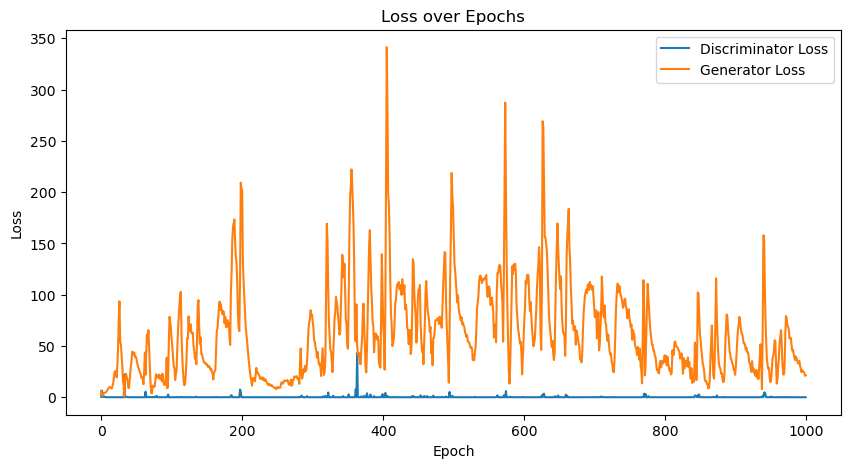

In [29]:
d_losses, g_losses = train_gan(gan, train_dataset, z_dim=100, epochs=1000)
plot_losses(d_losses, g_losses)


1/1 [==============================] - 0s 102ms/step


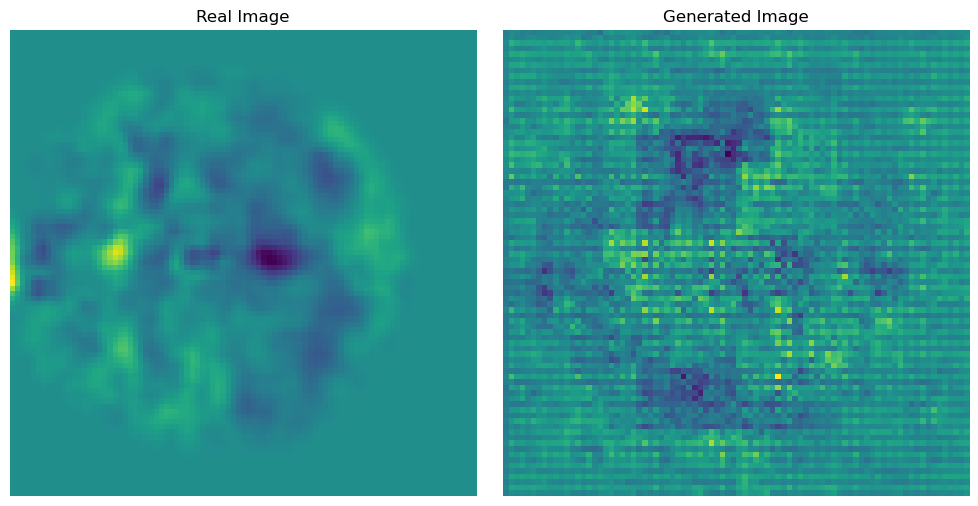

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a single fake image
z = np.random.normal(0, 1, (1, z_dim))
generated_image = generator.predict(z)[0]  # [0] to get the single image from the batch

# Get a single real image
# Use an iterator to get a batch of real images from train_dataset, then take the first image from the batch
real_images_labels = next(iter(train_dataset))
real_image = real_images_labels[0][0]  # [0][0] to get the first image from the batch

# Plot the real and fake images side by side
plt.figure(figsize=(10, 5))

# Plot real image
plt.subplot(1, 2, 1)
plt.imshow(real_image[:, :,10])  # adjust indexing based on your image data format
plt.title('Real Image')
plt.axis('off')

# Plot fake image
plt.subplot(1, 2, 2)
plt.imshow(generated_image[:, :, 10])  # adjust indexing based on your image data format
plt.title('Generated Image')
plt.axis('off')

plt.tight_layout()
plt.show()


In [32]:
# Save the generator, discriminator, and the entire GAN
generator.save('generator_model_v2.h5')
discriminator.save('discriminator_model_v2.h5')
gan.save('gan_model_v2.h5')


In [33]:
from tensorflow.keras.models import load_model

# Load the models
generator = load_model('generator_model_v2.h5')
discriminator = load_model('discriminator_model_v2.h5')
gan = load_model('gan_model_v2.h5')


In [34]:
# Assuming you have the gan model and the train_dataset already defined and in memory

additional_epochs = 500  # or however many more you want to train
d_losses_continued, g_losses_continued = train_gan(gan, train_dataset, z_dim=100, epochs=additional_epochs)

# You can now append these new loss values to your original losses if you kept track of them
d_losses += d_losses_continued
g_losses += g_losses_continued

# And then you can plot the updated losses
plot_losses(d_losses, g_losses)


1/1 [==============================] - 0s 82ms/step


RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.